# TAHLR Supplement: Document Term Matrices 

This TAHLR supplement shows how to build a document term matrix (DTM) on your own set of files, using the first three books of Homer's *Odyssey* (as found in the `data/texts/lyoc` folder from Week 2) and CountVectorizer and TfidfTransformer from scikit-learn.

In [104]:
# Imports

import nltk
from nltk import word_tokenize

In [105]:
# Get list of files

from glob import glob

files = sorted(glob('/Users/katherinethomson/Downloads/*.txt'))

print(len(files))

21


In [106]:
# Make list of texts

texts = []

for file in files:
    with open(file, 'r', encoding='utf-8', errors='replace') as f:
        text = f.read()
        texts.append(text)

print(len(texts))

21


In [107]:
type(texts[0])

str

In [108]:
## NB: Need to install scikit-learn first
# pip install -U scikit-learn

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

In [110]:
MIN_DF = 2
MAX_DF = 3
LOWERCASE = True
STOPWORDS = None
TOKEN_PATTERN = r'\b[^\W\d_]+\b'

# cf. https://stackoverflow.com/a/35615151
# min_df is used for removing terms that appear too infrequently. For example:
#     min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
#     min_df = 5 means "ignore terms that appear in less than 5 documents".
# max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:
#     max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
#     max_df = 25 means "ignore terms that appear in more than 25 documents".

CV = CountVectorizer(input='content', min_df=MIN_DF, max_df=MAX_DF, stop_words=None, lowercase=LOWERCASE, token_pattern=TOKEN_PATTERN)

In [111]:
type(CV)

sklearn.feature_extraction.text.CountVectorizer

In [112]:
CV.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 3,
 'max_features': None,
 'min_df': 2,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '\\b[^\\W\\d_]+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [113]:
dtm = CV.fit_transform(texts)

In [114]:
print(type(dtm))

<class 'scipy.sparse._csr.csr_matrix'>


In [115]:
dtm.shape

(21, 9473)

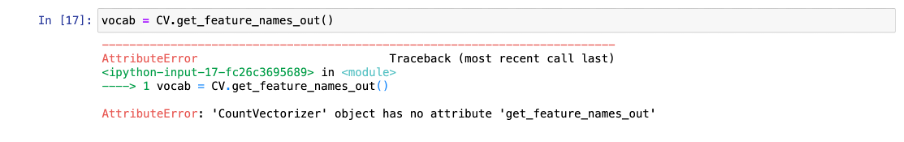


#-	I’ve tried updating python, scikit learn, anaconda. 
#-	I’ve looked up scikit learn and it claims to have the CV attribute that it claims here not to have. 
#-	I've checked directory - it is in there. 
# Ah, i needed to resolve an encoding error in my files. 

In [116]:
print(dir(CV))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_char_ngrams', '_char_wb_ngrams', '_check_feature_names', '_check_n_features', '_check_stop_words_consistency', '_check_vocabulary', '_count_vocab', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_limit_features', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sort_features', '_stop_words_id', '_validate_data', '_validate_ngram_range', '_validate_params', '_validate_vocabulary', '_warn_for_unused_params', '_white_spaces', '_word_ngrams', 'analyzer', 'binary'

In [117]:
vocab = CV.get_feature_names_out()

In [118]:
print(vocab[:10])

['abacis' 'abacorum' 'abacos' 'abdicavit' 'abessent' 'abest' 'abici'
 'abiciunt' 'abiecto' 'abiectos']


In [119]:
files

['/Users/katherinethomson/Downloads/Plin_1.txt',
 '/Users/katherinethomson/Downloads/Plin_18.txt',
 '/Users/katherinethomson/Downloads/Plin_19.txt',
 '/Users/katherinethomson/Downloads/Plin_20.txt',
 '/Users/katherinethomson/Downloads/Plin_21.txt',
 '/Users/katherinethomson/Downloads/Plin_22.txt',
 '/Users/katherinethomson/Downloads/Plin_23.txt',
 '/Users/katherinethomson/Downloads/Plin_24.txt',
 '/Users/katherinethomson/Downloads/Plin_25.txt',
 '/Users/katherinethomson/Downloads/Plin_26.txt',
 '/Users/katherinethomson/Downloads/Plin_27.txt',
 '/Users/katherinethomson/Downloads/Plin_28.txt',
 '/Users/katherinethomson/Downloads/Plin_29.txt',
 '/Users/katherinethomson/Downloads/Plin_30.txt',
 '/Users/katherinethomson/Downloads/Plin_31.txt',
 '/Users/katherinethomson/Downloads/Plin_32.txt',
 '/Users/katherinethomson/Downloads/Plin_33.txt',
 '/Users/katherinethomson/Downloads/Plin_34.txt',
 '/Users/katherinethomson/Downloads/Plin_35.txt',
 '/Users/katherinethomson/Downloads/Plin_36.txt',
 

In [120]:
def filename2label(filename):
    return filename.split('/')[-1].split('.')[0]

labels = [filename2label(file) for file in files]
print(labels)

['Plin_1', 'Plin_18', 'Plin_19', 'Plin_20', 'Plin_21', 'Plin_22', 'Plin_23', 'Plin_24', 'Plin_25', 'Plin_26', 'Plin_27', 'Plin_28', 'Plin_29', 'Plin_30', 'Plin_31', 'Plin_32', 'Plin_33', 'Plin_34', 'Plin_35', 'Plin_36', 'Plin_37']


In [121]:
## NB: Need to install scikit-learn first
# pip install -U pandas

In [122]:
import pandas as pd

In [123]:
df = pd.DataFrame(dtm.toarray(), columns=vocab, index=labels)

In [124]:
df

,abacis,abacorum,abacos,abdicavit,abessent,abest,abici,abiciunt,abiecto,abiectos,...,zoroastre,zoroastren,zoroastres,zoster,δια,διος,ηρακλεους,κωδυων,ληξιπυρετους,πυρον
Plin_1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,1,1,1,1,1,1,1
Plin_18,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Plin_19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Plin_20,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,2,0,0,2,1,0
Plin_21,0,0,0,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Plin_22,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Plin_23,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Plin_24,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Plin_25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Plin_26,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [125]:
df['abacis']

Plin_1     0
Plin_18    0
Plin_19    0
Plin_20    0
Plin_21    0
Plin_22    0
Plin_23    0
Plin_24    0
Plin_25    0
Plin_26    0
Plin_27    0
Plin_28    0
Plin_29    0
Plin_30    0
Plin_31    0
Plin_32    0
Plin_33    0
Plin_34    0
Plin_35    1
Plin_36    0
Plin_37    1
Name: abacis, dtype: int64

In [126]:
df.loc['Plin_33']

abacis          0
abacorum        0
abacos          1
abdicavit       0
abessent        0
               ..
διος            0
ηρακλεους       0
κωδυων          0
ληξιπυρετους    0
πυρον           0
Name: Plin_33, Length: 9473, dtype: int64

In [127]:
df.loc['Plin_33'].sort_values(ascending=False).head(10)

anulorum        7
anulo           7
anuli           6
mille           5
restinguitur    4
aureos          4
mm              4
gemmas          4
equitum         4
orator          4
Name: Plin_33, dtype: int64

In [128]:
pl33_dict = df.loc['Plin_33'].to_dict()

In [129]:
print(dict(list(pl33_dict.items())[:10]))

{'abacis': 0, 'abacorum': 0, 'abacos': 1, 'abdicavit': 0, 'abessent': 0, 'abest': 0, 'abici': 0, 'abiciunt': 1, 'abiecto': 0, 'abiectos': 1}


In [130]:
from sklearn.feature_extraction.text import TfidfTransformer

TT = TfidfTransformer(use_idf=True).fit(dtm)
tfidf_dtm = TT.transform(dtm)

In [131]:
tfidf_df = pd.DataFrame(tfidf_dtm.toarray(), columns=CV.get_feature_names_out(), index=labels)

In [132]:
tfidf_df

,abacis,abacorum,abacos,abdicavit,abessent,abest,abici,abiciunt,abiecto,abiectos,...,zoroastre,zoroastren,zoroastres,zoster,δια,διος,ηρακλεους,κωδυων,ληξιπυρετους,πυρον
Plin_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015582,0.000000,0.000000,0.007791,0.007791,0.007791,0.007791,0.007791,0.007791,0.007791
Plin_18,0.000000,0.000000,0.000000,0.000000,0.009241,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.009241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Plin_19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Plin_20,0.000000,0.000000,0.000000,0.029299,0.000000,0.000000,0.000000,0.000000,0.029299,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.058597,0.000000,0.000000,0.058597,0.029299,0.000000
Plin_21,0.000000,0.000000,0.000000,0.000000,0.000000,0.048994,0.000000,0.022142,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Plin_22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028277,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Plin_23,0.000000,0.000000,0.000000,0.000000,0.028804,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Plin_24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030435,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Plin_25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Plin_26,0.000000,0.000000,0.000000,0.018304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.018304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [133]:
tfidf_df.iloc[0].sort_values(ascending=False).head(10)

pr               0.490827
observationes    0.397336
continentur      0.280473
varrone          0.264891
theophrasto      0.202564
mirabilia        0.140236
metrodoro        0.124654
nicandro         0.124654
hygino           0.124654
fabiano          0.109073
Name: Plin_1, dtype: float64

In [134]:
tfidf_df.iloc[1].sort_values(ascending=False).head(10)

kal             0.451034
triticum        0.221781
caesari         0.200459
frumenta        0.175576
panicum         0.129372
occidit         0.125287
aequinoctium    0.116935
vesperi         0.116935
arva            0.110890
hiemem          0.108582
Name: Plin_18, dtype: float64

In [135]:
tfidf_df.iloc[2].sort_values(ascending=False).head(10)

aequinoctio     0.198088
ocimum          0.178279
favonio         0.158470
hortos          0.153410
hiemem          0.138661
verno           0.138661
anetum          0.109578
sariri          0.109578
satus           0.109578
aequinoctium    0.099044
Name: Plin_19, dtype: float64

In [136]:
tfidf_df.iloc[3].sort_values(ascending=False).head(10)

praecordiorum    0.158892
voci             0.132410
arterias         0.117195
vesparum         0.105928
aridae           0.105928
coctam           0.105928
acetabulo        0.105928
pulei            0.087896
aethiopicum      0.087896
convenire        0.087896
Name: Plin_20, dtype: float64

In [137]:
tfidf_df.iloc[4].sort_values(ascending=False).head(10)

flores          0.309986
violae          0.146981
quina           0.122485
amaracum        0.122485
nardum          0.097988
aphace          0.097988
odoratissima    0.097988
baccar          0.097988
medicas         0.088567
coronamenta     0.073491
Name: Plin_21, dtype: float64

In [138]:
tfidf_df.iloc[5].sort_values(ascending=False).head(10)

medicinas       0.156424
conmanducata    0.125139
callo           0.125139
inflat          0.093855
exercitu        0.093855
cotoneo         0.093855
fuerant         0.093855
servatis        0.084832
suilli          0.084832
plantagini      0.062570
Name: Plin_22, dtype: float64

In [139]:
df.T

,Plin_1,Plin_18,Plin_19,Plin_20,Plin_21,Plin_22,Plin_23,Plin_24,Plin_25,Plin_26,...,Plin_28,Plin_29,Plin_30,Plin_31,Plin_32,Plin_33,Plin_34,Plin_35,Plin_36,Plin_37
abacis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
abacorum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
abacos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
abdicavit,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
abessent,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
διος,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ηρακλεους,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
κωδυων,1,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ληξιπυρετους,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
tfidf_df.T

,Plin_1,Plin_18,Plin_19,Plin_20,Plin_21,Plin_22,Plin_23,Plin_24,Plin_25,Plin_26,...,Plin_28,Plin_29,Plin_30,Plin_31,Plin_32,Plin_33,Plin_34,Plin_35,Plin_36,Plin_37
abacis,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.018481,0.0,0.017615
abacorum,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.018481,0.0,0.017615
abacos,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.023503,0.0,0.000000,0.0,0.017615
abdicavit,0.000000,0.000000,0.0,0.029299,0.0,0.0,0.000000,0.0,0.0,0.018304,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
abessent,0.000000,0.009241,0.0,0.000000,0.0,0.0,0.028804,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
διος,0.007791,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
ηρακλεους,0.007791,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
κωδυων,0.007791,0.000000,0.0,0.058597,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
ληξιπυρετους,0.007791,0.000000,0.0,0.029299,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
